In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


<h2>Data Preparation

In [2]:
df = pd.read_csv("data_set.csv")

features = [
    'close_line_total',
    'close_odds_total_over',
    'close_odds_total_under',
    'close_odds_ah_1',
    'close_odds_ah_2',
    'close_line_ah_1',
    'close_line_ah_2'
]

target_home = 'corners_result_home_1st_ht'
target_away = 'corners_result_away_1st_ht'

X = df[features]
y_home = df[target_home]
y_away = df[target_away]

print(df[features].isna().sum()) 
print(f'target_home {df[target_home].isna().sum()}')
print(f'target_away {df[target_away].isna().sum()}')
df = df[df['close_line_total'] >= 4] # Super small total line should mean incorrect data
df[features].describe()

close_line_total          0
close_odds_total_over     0
close_odds_total_under    0
close_odds_ah_1           0
close_odds_ah_2           0
close_line_ah_1           0
close_line_ah_2           0
dtype: int64
target_home 0
target_away 0


,close_line_total,close_odds_total_over,close_odds_total_under,close_odds_ah_1,close_odds_ah_2,close_line_ah_1,close_line_ah_2
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,9.525540,1.914934,1.916914,1.916359,1.915197,-0.841246,0.841246
std,0.540562,0.065414,0.066197,0.062426,0.062390,1.583725,1.583725
min,8.000000,1.760000,1.740000,1.690000,1.670000,-6.500000,-5.000000
25%,9.000000,1.860000,1.860000,1.860000,1.860000,-2.000000,0.000000
50%,9.500000,1.920000,1.920000,1.920000,1.920000,-1.000000,1.000000
75%,10.000000,1.970000,1.970000,1.970000,1.970000,0.000000,2.000000
max,11.000000,2.070000,2.070000,2.120000,2.090000,5.000000,6.500000


<h2>Training

X_val and X_test: 354 rows <br>
X_train: 1652 rows

Should be adequete amount of data

In [9]:
# Train + val/test split
X_train, X_temp, y_home_train, y_home_temp, y_away_train, y_away_temp = train_test_split(
    X, y_home, y_away, test_size=0.3, random_state=42
)

# Val + test split
X_val, X_test, y_home_val, y_home_test, y_away_val, y_away_test = train_test_split(
    X_temp, y_home_temp, y_away_temp, test_size=0.5, random_state=42
)

X_train.describe()
#X_val.describe()
#X_test.describe()

,close_line_total,close_odds_total_over,close_odds_total_under,close_odds_ah_1,close_odds_ah_2,close_line_ah_1,close_line_ah_2
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,9.520884,1.913699,1.918021,1.916659,1.914927,-0.860926,0.860926
std,0.563115,0.065834,0.066811,0.063078,0.062569,1.563391,1.563391
min,1.750000,1.760000,1.740000,1.690000,1.720000,-6.500000,-4.500000
25%,9.000000,1.860000,1.860000,1.860000,1.860000,-2.000000,0.000000
50%,9.500000,1.910000,1.920000,1.920000,1.920000,-1.000000,1.000000
75%,10.000000,1.970000,1.970000,1.970000,1.960000,0.000000,2.000000
max,11.000000,2.060000,2.070000,2.050000,2.170000,4.500000,6.500000


In [4]:
lr_home = LinearRegression().fit(X_train, y_home_train)
lr_away = LinearRegression().fit(X_train, y_away_train)

In [5]:
rf_home = RandomForestRegressor(random_state=42).fit(X_train, y_home_train)
rf_away = RandomForestRegressor(random_state=42).fit(X_train, y_away_train)

In [6]:
gb_home = GradientBoostingRegressor(random_state=42).fit(X_train, y_home_train)
gb_away = GradientBoostingRegressor(random_state=42).fit(X_train, y_away_train)

<h2>Evaluation</h2>

In [7]:
def evaluate(model, X, y_true):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    print(f"{model} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return mae, rmse

print("Home team:")
evaluate(lr_home, X_val, y_home_val)
evaluate(rf_home, X_val, y_home_val)
evaluate(gb_home, X_val, y_home_val)

print("\nAway team:")
evaluate(lr_away, X_val, y_away_val)
evaluate(rf_away, X_val, y_away_val)
evaluate(gb_away, X_val, y_away_val)


Home team:
LinearRegression() - MAE: 1.41, RMSE: 1.82
RandomForestRegressor(random_state=42) - MAE: 1.56, RMSE: 1.97
GradientBoostingRegressor(random_state=42) - MAE: 1.44, RMSE: 1.84

Away team:
LinearRegression() - MAE: 1.20, RMSE: 1.54
RandomForestRegressor(random_state=42) - MAE: 1.25, RMSE: 1.59
GradientBoostingRegressor(random_state=42) - MAE: 1.21, RMSE: 1.56


(1.2141946462348767, 1.5563211027294634)

<Axes: >

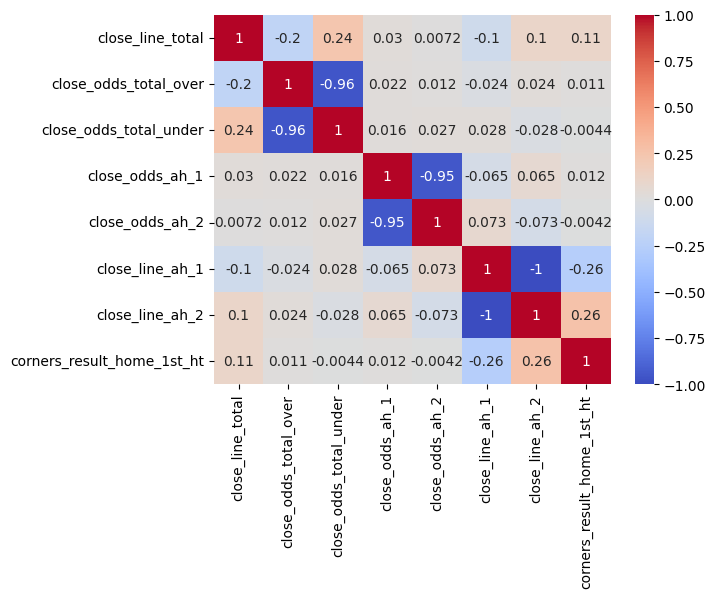

In [8]:
sns.heatmap(df[features + [target_home]].corr(), annot=True, cmap='coolwarm')

<Axes: >

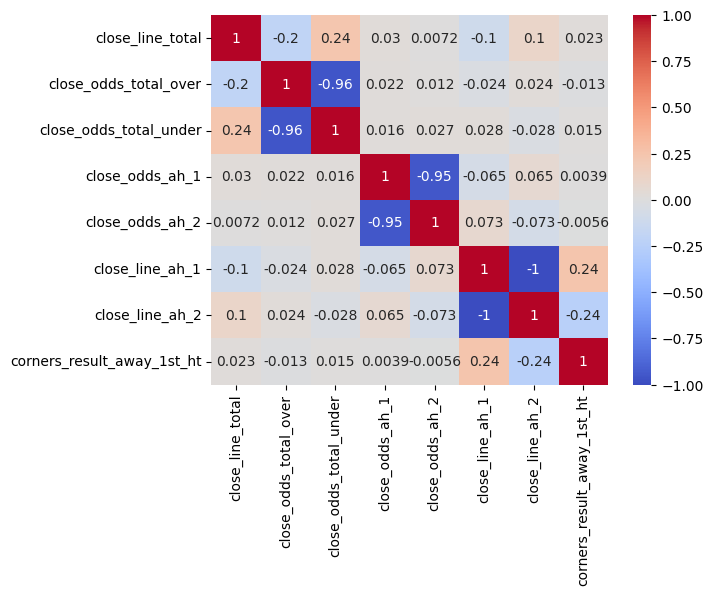

In [9]:
sns.heatmap(df[features + [target_away]].corr(), annot=True, cmap='coolwarm')
# Note how there is no linear correlation for close_line_total on the away team. 
# Intuitively this seems bad

<h4>Further investigation into feature importance, specifically close_line_total

<Axes: title={'center': 'Random Forest Feature Importance (Away)'}>

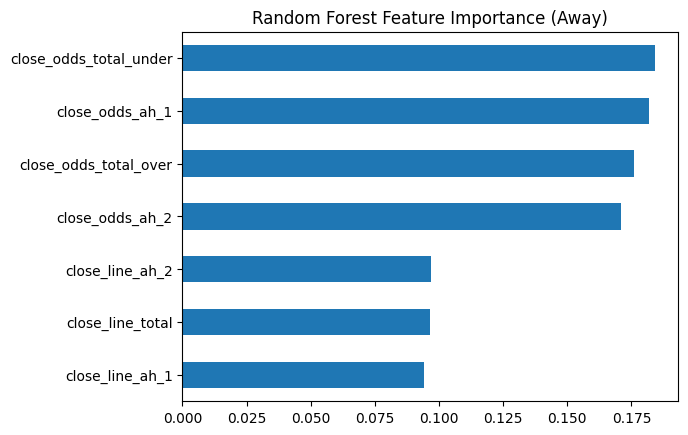

In [10]:
importances_rf = rf_away.feature_importances_
pd.Series(importances_rf, index=features).sort_values().plot(kind='barh', title='Random Forest Feature Importance (Away)')

<Axes: title={'center': 'Gradient Boosting Feature Importance (Away)'}>

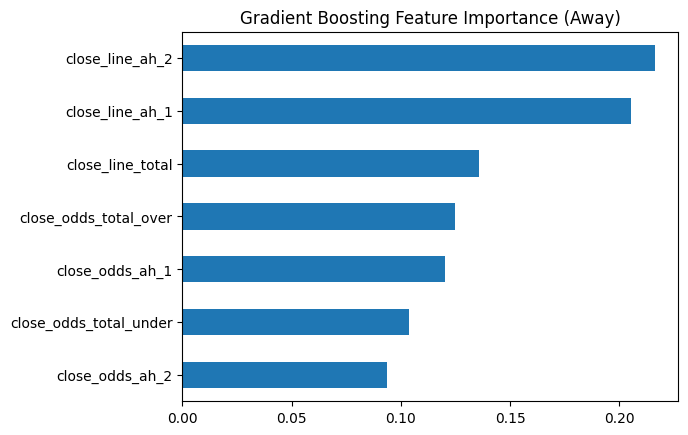

In [11]:
importances_gb = gb_away.feature_importances_
pd.Series(importances_gb, index=features).sort_values().plot(kind='barh', title='Gradient Boosting Feature Importance (Away)')


<h5>Due to linear regressions intuitively wrong importance of the feature close_line total for away team first half corners (overfitting?), I choose Gradient boost regressor for the away model

In [12]:
model_home = lr_home
model_away = gb_away

<h2>Predict on test data

In [13]:
y_home_pred = model_home.predict(X_test)
y_away_pred = model_away.predict(X_test)

<h2>Analysis

In [14]:
mae_home = mean_absolute_error(y_home_test, y_home_pred)
rmse_home = root_mean_squared_error(y_home_test, y_home_pred)
print(f"Home team – Test MAE: {mae_home:.2f}, RMSE: {rmse_home:.2f}")

mae_away = mean_absolute_error(y_away_test, y_away_pred)
rmse_away = root_mean_squared_error(y_away_test, y_away_pred)
print(f"Away team – Test MAE: {mae_away:.2f}, RMSE: {rmse_away:.2f}")


Home team – Test MAE: 1.38, RMSE: 1.73
Away team – Test MAE: 1.27, RMSE: 1.61


<h5>Analyzing the first 5 predictions I can not see anything strange

In [15]:
print("First 5 datas in X_test:", X_test[:5])
print("First 5 predictions (Home):", y_home_pred[:5])
print("First 5 predictions (Away):", y_away_pred[:5])

First 5 datas in X_test:       close_line_total  close_odds_total_over  close_odds_total_under  \
889                9.5                   1.86                    1.99   
598                9.5                   1.82                    2.04   
18                10.0                   1.90                    1.91   
554                9.0                   1.97                    1.85   
1285               9.5                   1.81                    2.01   

      close_odds_ah_1  close_odds_ah_2  close_line_ah_1  close_line_ah_2  
889              1.88             1.97             -1.0              1.0  
598              1.90             1.95             -1.5              1.5  
18               1.81             2.00             -1.0              1.0  
554              1.97             1.85              0.0              0.0  
1285             1.82             2.01              0.0              0.0  
First 5 predictions (Home): [2.61992231 2.73071008 2.70188158 2.14749041 2.31837969]
F

<h5>In the prediction graph we can see that there are no crazy predictions. No negative and no incredibly big predictions.

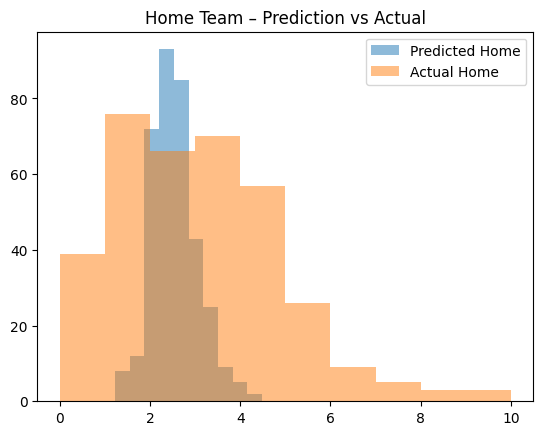

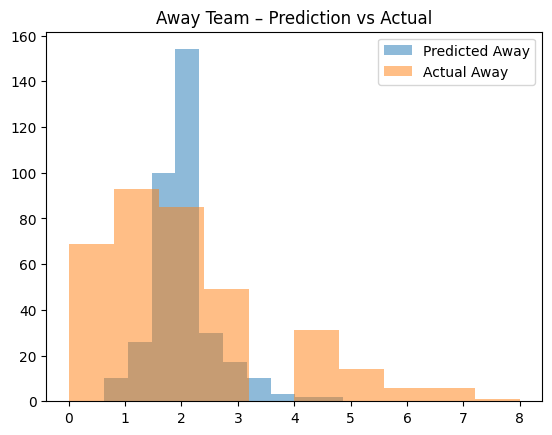

In [16]:
plt.hist(y_home_pred, alpha=0.5, label='Predicted Home')
plt.hist(y_home_test, alpha=0.5, label='Actual Home')
plt.legend()
plt.title("Home Team – Prediction vs Actual")
plt.show()

plt.hist(y_away_pred, alpha=0.5, label='Predicted Away')
plt.hist(y_away_test, alpha=0.5, label='Actual Away')
plt.legend()
plt.title("Away Team – Prediction vs Actual")
plt.show()


<h2>Save the 2 models

In [19]:
home_path = f"models/home_best.joblib"
away_path = f"models/away_best.joblib"
joblib.dump(model_home, home_path)
joblib.dump(model_away, away_path)

['models/away_best.joblib']